##Image Recognition Model

In [1]:
from torchvision import models
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [2]:
resnet = models.resnet101(pretrained=True)
resnet

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

In [4]:
alexnet = models.AlexNet()

Saving dog.png to dog.png


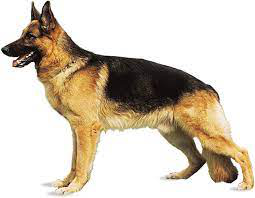

In [6]:
from google.colab import files
uploaded = files.upload()
from PIL import Image
img = Image.open("dog.png")
img

In [7]:
img_t = preprocess(img)

In [8]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()
out = resnet(batch_t)
out

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor([[ 1.1972e+00, -3.6480e-02, -1.8836e+00, -1.1264e+00, -1.6671e+00,
         -1.4856e-01, -3.3143e+00, -2.1515e+00, -8.3851e-01, -2.4016e+00,
         -2.9157e-01, -2.6593e+00, -2.9859e+00, -2.7733e+00, -3.9151e+00,
         -2.8035e+00, -5.8918e-01, -5.1138e-01, -2.7879e+00, -1.8718e+00,
         -3.5365e+00,  3.4130e-01, -3.8133e+00, -1.9730e+00, -4.0559e+00,
         -1.1056e+00, -1.1230e+00, -1.6637e+00, -2.0765e+00, -4.6684e-02,
         -1.1530e+00, -2.2574e+00, -8.9171e-01,  3.2869e-01, -1.8444e+00,
         -4.4505e-01, -4.9187e-01, -1.1748e+00,  7.5620e-01, -2.3010e+00,
         -2.1137e+00, -1.7050e+00, -9.3561e-02,  1.6155e-01, -6.0679e-01,
          2.9782e-01, -2.2367e+00, -8.7827e-02, -2.9049e+00, -2.9410e+00,
         -1.3630e+00,  2.3677e+00, -5.1035e-01, -2.3006e+00, -6.1938e-01,
         -2.5245e+00, -4.3941e+00, -2.3062e+00, -6.7667e-01, -8.5609e-01,
          2.8196e-02, -1.9485e+00, -6.6683e-01,  1.2480e+00, -4.6658e-01,
         -1.7824e-01,  3.5678e-01, -1.

In [11]:

with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

("235: 'German shepherd, German shepherd dog, German police dog, alsatian',",
 98.0517349243164)

##Our input image is correctly detected by the model and it yields an accuracy of 98%